In [2]:
# %pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

### Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return results, image

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(
        image, 
        results.face_landmarks, 
        mp_holistic.FACEMESH_CONTOURS,
        mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
        mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1),
    ) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [8]:
mp_holistic.FACEMESH_CONTOURS??

Type:        frozenset
String form: frozenset({(270, 409), (176, 149), (37, 0), (84, 17), (318, 324), (293, 334), (386, 385), (7, 163), (33, 246), (17, 314), (374, 380), (251, 389), (390, 373), (267, 269), (295, 285), (389, 356), (173, 133), (33, 7), (377, 152), (158, 157), (405, 321), (54, 103), (263, 466), (324, 308), (67, 109), (409, 291), (157, 173), (454, 323), (388, 387), (78, 191), (148, 176), (311, 310), (39, 37), (249, 390), (144, 145), (402, 318), (80, 81), (310, 415), (153, 154), (384, 398), (397, 365), (234, 127), (103, 67), (282, 295), (338, 297), (378, 400), (127, 162), (321, 375), (375, 291), (317, 402), (81, 82), (154, 155), (91, 181), (334, 296), (297, 332), (269, 270), (150, 136), (109, 10), (356, 454), (58, 132), (312, 311), (152, 148), (415, 308), (161, 160), (296, 336), (65, 55), (61, 146), (78, 95), (380, 381), (398, 362), (361, 288), (246, 161), (162, 21), (0, 267), (82, 13), (132, 93), (314, 405), (10, 338), (178, 87), (387, 386), (381, 382), (70, 63), (61, 185)

In [10]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        # make detections
        results, image = mediapipe_detection(frame, holistic)

        # draw landmarks
        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCv Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

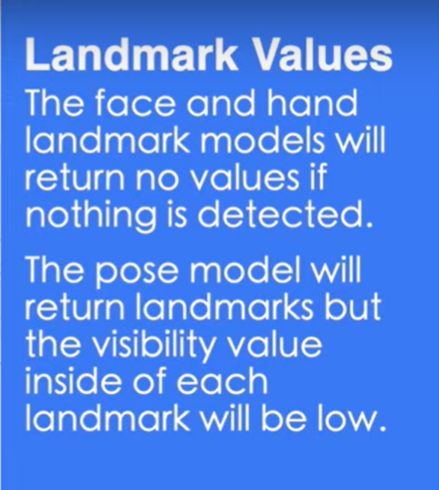

In [12]:
frame

array([[[ 23, 138,  95],
        [  0, 109,  68],
        [ 13, 117,  80],
        ...,
        [131, 178, 173],
        [133, 180, 175],
        [143, 190, 184]],

       [[ 29, 137,  98],
        [  8, 112,  75],
        [ 10, 107,  74],
        ...,
        [133, 179, 173],
        [136, 182, 177],
        [140, 186, 181]],

       [[ 48, 141, 110],
        [ 38, 128,  99],
        [ 26, 111,  84],
        ...,
        [144, 188, 182],
        [175, 218, 213],
        [193, 235, 231]],

       ...,

       [[146, 148, 121],
        [143, 146, 121],
        [140, 144, 122],
        ...,
        [128, 171, 154],
        [122, 166, 148],
        [119, 165, 147]],

       [[140, 142, 115],
        [140, 142, 117],
        [141, 144, 122],
        ...,
        [124, 171, 152],
        [120, 169, 150],
        [118, 169, 149]],

       [[146, 149, 121],
        [141, 144, 118],
        [140, 142, 120],
        ...,
        [125, 173, 154],
        [123, 174, 154],
        [119, 172, 151]]

In [13]:
draw_styled_landmarks(frame, results)

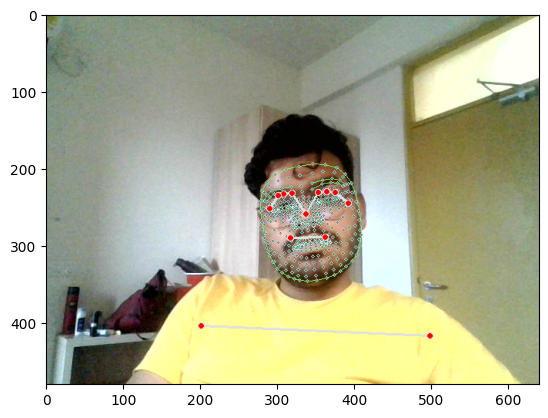

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### Extract keypoint values

In [15]:
if results.right_hand_landmarks:
    for res in results.right_hand_landmarks.landmark:
        print(res)

In [16]:
# pose = [] # Store the landmarks in a list with respect to indexes
# for res in results.pose_landmarks.landmark:
#     test = np.array([res.x, res.y, res.z, res.visibility])
#     pose.append(test)

pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark])
pose = pose.flatten()

In [17]:
pose

array([ 5.26680827e-01,  5.40665984e-01, -1.11542380e+00,  9.99833345e-01,
        5.52259803e-01,  4.81595546e-01, -1.06076360e+00,  9.99511778e-01,
        5.68964183e-01,  4.80892450e-01, -1.06098807e+00,  9.99692738e-01,
        5.86346984e-01,  4.81258452e-01, -1.06129479e+00,  9.99527514e-01,
        4.99879599e-01,  4.84820187e-01, -1.05936396e+00,  9.99513686e-01,
        4.82541263e-01,  4.87309396e-01, -1.05869830e+00,  9.99687612e-01,
        4.70706701e-01,  4.90666687e-01, -1.05916333e+00,  9.99566913e-01,
        6.13463283e-01,  5.12369871e-01, -6.51711285e-01,  9.99669313e-01,
        4.53669935e-01,  5.25571167e-01, -6.20212674e-01,  9.99746442e-01,
        5.66929638e-01,  6.03200734e-01, -9.54802632e-01,  9.99809206e-01,
        4.95966434e-01,  6.05739176e-01, -9.46610451e-01,  9.99819279e-01,
        7.79443681e-01,  8.69773924e-01, -3.27276886e-01,  9.98349190e-01,
        3.14599633e-01,  8.43644977e-01, -4.00950432e-01,  9.98394132e-01,
        9.04837012e-01,  

In [18]:
# observe the shape the len of each array using results object
def extract_keypoints(results):
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3) 

    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)
result_test

array([ 0.52668083,  0.54066598, -1.1154238 , ...,  0.        ,
        0.        ,  0.        ])

In [20]:
np.save('0', result_test)

### Setup folder for collections

#hello 
##0 ... 29 folders

In [21]:
# path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# actions trying to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30 # 30 sequences of each action 
sequence_length = 30 # 30 frames per sequence -> fps

In [22]:
for action in actions:
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### Collect keypoints values for training and testing

In [50]:
# rerun this code for correct data collection
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # loop through actions
    for action in actions: 
        for sequence in range(no_sequences):
            # loop through video length aka sequence length
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
            
                # make detections
                results, image = mediapipe_detection(frame, holistic)

                # draw landmarks
                draw_styled_landmarks(image, results)

                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # new export keypoints logic
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                cv2.imshow('OpenCv Feed', image)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

In [26]:
cap.release()
cv2.destroyAllWindows()

### Preprocess Data and create Labels and Features

In [23]:
from sklearn.model_selection import train_test_split # partition data into training and testing sets
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding

In [24]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [25]:
sequences, labels = [], []
for action in actions: 
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), '{}.npy'.format(frame_num)))
            window.append(res) # append each frame to window 0->30 frames
        sequences.append(window) # append each window to sequences
        labels.append(label_map[action])

In [26]:
np.array(sequences).shape

(90, 30, 1662)

In [27]:
np.array(labels).shape

(90,)

In [28]:
X = np.array(sequences)
y = to_categorical(labels).astype(int) # convert to one-hot-encoding
# 100 -> hello , 010 -> thanks, 001 -> iloveyou encoding

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [30]:
X_test.shape

(5, 30, 1662)

### Build and train LSTM Nueral Network

In [31]:
from tensorflow.keras.models import Sequential # sequential neural network model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard # tensorboard for visualization (when model is being training)

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [46]:
model = Sequential() # make layers by layers model
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662))) # 64 neurons, return sequence for next layer, 1662 features
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) # returns 3 multiclass classification

In [34]:
res = [.7, .2, .1] # model returns output
res

[0.7, 0.2, 0.1]

In [35]:
index = np.argmax(res) # get the index of the highest value
actions[index] # get the action 


'hello'

In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.compile??
# using multiclass classification, so use categorical_crossentropy

In [37]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 49ms/step - loss: 1.2109 - categorical_accuracy: 0.2824
Epoch 2/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.1328 - categorical_accuracy: 0.3412
Epoch 3/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.1723 - categorical_accuracy: 0.3529
Epoch 4/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0587 - categorical_accuracy: 0.5059
Epoch 5/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.0652 - categorical_accuracy: 0.3647
Epoch 6/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0521 - categorical_accuracy: 0.3765
Epoch 7/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.0226 - categorical_accuracy: 0.7059
Epoch 8/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.0026 - categorical_accuracy: 0.6706
Epoch 9/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.0079 - categorical_accuracy: 0.4588
E

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

### Make Predictions

In [39]:
res = model.predict(X_test)

1/1 [==============================] - 0s 313ms/step


In [42]:
actions[np.argmax(res[1])]

'thanks'

In [43]:
actions[np.argmax(y_test[1])]

'iloveyou'

### Save weights

In [44]:
model.save('action.h5')

c:\Users\varun\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
del model

In [48]:
model.load_weights('action.h5')

### Evaluation using confusion matrix and accuracy

In [50]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

### Test in Real Time

In [51]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 261ms/step


In [52]:
yTrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [55]:
yTrue

[2, 2, 2, 1, 2]

In [56]:
multilabel_confusion_matrix(yTrue, yhat)

array([[[1, 3],
        [0, 1]],

       [[1, 0],
        [3, 1]]], dtype=int64)

In [58]:
accuracy_score(yTrue, yhat)

0.4

### Test in Real Time

In [60]:
# new detection variables
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        # make detections
        results, image = mediapipe_detection(frame, holistic)

        # draw landmarks
        draw_styled_landmarks(image, results)

        # prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0, keypoints) 
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

        # visualize prediction
        if res[np.argmax(res)] > threshold: 
            if len(sentence) > 0: 
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5:
            sentence = sentence[-5:]

        cv2.rectangle(image, (0,0), (640, 640), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)  

        cv2.imshow('OpenCv Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 33ms/step
thanks
1/1 [==============================] - 0s 33ms/step
thanks
1/1 [==============================] - 0s 32ms/step
thanks
1/1 [==============================] - 0s 33ms/step
thanks
1/1 [==============================] - 0s 33ms/step
thanks
1/1 [==============================] - 0s 33ms/step
thanks
1/1 [==============================] - 0s 32ms/step
thanks
1/1 [==============================] - 0s 41ms/step
thanks
1/1 [==============================] - 0s 33ms/step
thanks
1/1 [==============================] - 0s 33ms/step
thanks
1/1 [==============================] - 0s 25ms/step
thanks
1/1 [==============================] - 0s 33ms/step
thanks
1/1 [==============================] - 0s 25ms/step
thanks
1/1 [==============================] - 0s 24ms/step
thanks
1/1 [==============================] - 0s 32ms/step
thanks
1/1 [==============================] - 0s 25ms/step
thanks
1/1 [==============================] - 0s 25ms/step
than